# Data Visualization
Data visualization is one of the important tasks in data science project. It plays an important role when there is too much data because visualization turns huge amount of numbers into a digestible picture. Therefore, it is critical to have a good visualization in order to tell a story with number. Initium media had done quite a lot of data visualization with real life data.

From https://theinitium.com/article/20150812-hongkong-legcoanalysis/

![Legco Matrix](legco_matrix.png)



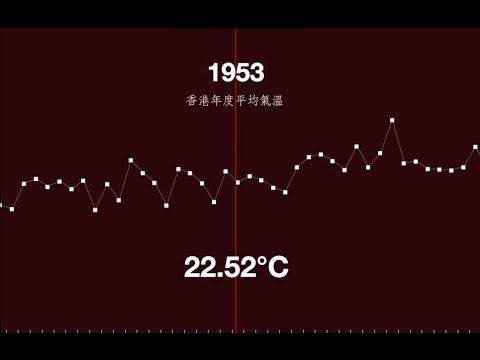

In [137]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('RWC-KJZGQV0')

# Basics in Matplotlib

Today we will go through graph plotting in Python. In this tutorial, we will be using a famous libary Matplotlib to demostrate how graph plotting is done in jupyter. Matplotlib is a common plotting library which generates 2D graphs and works well in both jupyter and IPython. The graph is in good quality which can be included into technical report and thesis. Matplotlib is designed to be simple and you can plot one graph with one single command.

In [215]:
import matplotlib.pyplot as plt

## Line Chart

Now let's try a simple line chart.

#  https://github.com/howawong/python-for-hkpug/

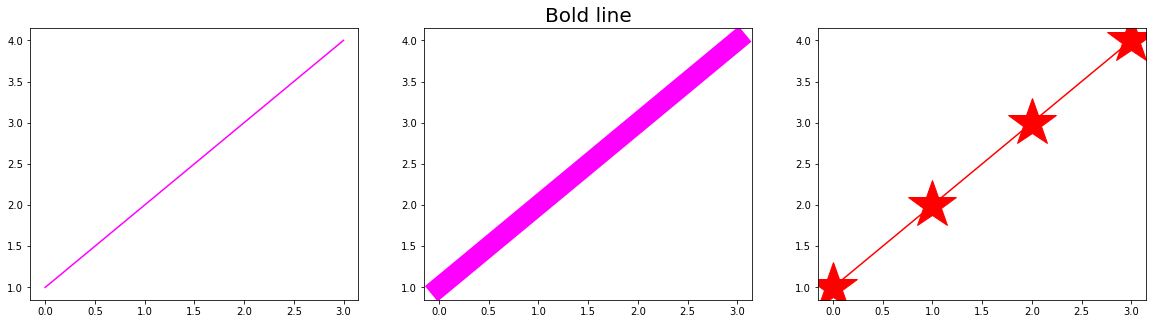

In [139]:
plt.rcParams["figure.figsize"] = (20, 5)
plt.subplot(1, 3, 1)
plt.plot([1, 2, 3, 4], c='#FF00FF')
plt.subplot(1, 3, 2)
plt.title("Bold line", fontsize=20)
plt.plot([1, 2, 3, 4], linewidth=20, c='#FF00FF')
plt.subplot(1, 3, 3)
plt.plot([1, 2, 3, 4], '*-', markersize=50, c='r')

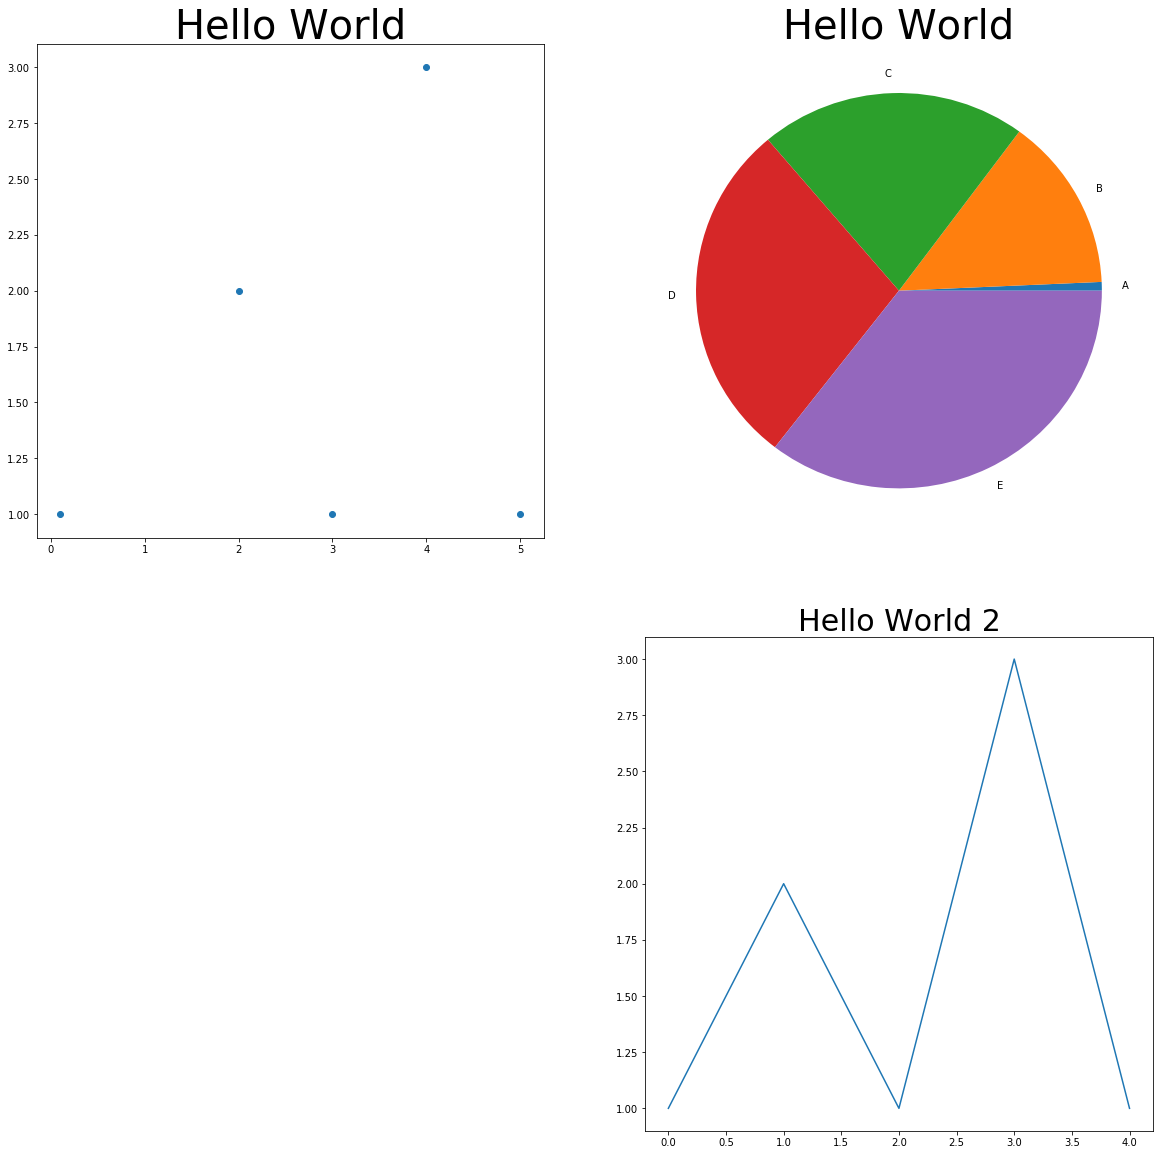

In [183]:
plt.rcParams["figure.figsize"] = (20, 20)
x = [0.1, 2, 3, 4, 5]
y = [1, 2, 1, 3, 1]
plt.subplot(2, 2, 1)
plt.title('Hello World', fontsize=40)
plt.scatter(x, y)
plt.subplot(2, 2, 2)
plt.title('Hello World', fontsize=40)
plt.pie(x, labels=['A', 'B', 'C', 'D', 'E'])
plt.subplot(2, 2, 4)
plt.title('Hello World 2', fontsize=30)
plt.plot(y)

Now let's more different kinds of graphs.

1. Bar
2. Histogram
3. Pie
4. Scatter

# Example 1: Map Visualization
In this example, we would do a simple map visualization of Hong Kong. We get the geojson data from https://data.gov.hk/en-data/dataset/hk-had-json1-hong-kong-administrative-boundaries/resource/d2a89ff1-72d7-4523-a7de-74a57ad3e14b.

# Pre-requisite
The following packages are required.

```
geopandas
shapely
```

Now let's read the file.

In [186]:
import geopandas as gpd
import pandas as pd
hkg = gpd.read_file('hkg.geojson')
del hkg['Administrative District Boundary of Hong Kong']
hkg

,地區號碼,District,地區,geometry
0,A,Central & Western,中西區,"POLYGON ((114.14951 22.29748, 114.10987 22.297..."
1,B,Wan Chai,灣仔,"POLYGON ((114.19771 22.2579, 114.19778 22.2580..."
2,C,Eastern,東區,"POLYGON ((114.21939 22.29568, 114.21087 22.300..."
3,D,Southern,南區,"POLYGON ((114.16338 22.25882, 114.16305 22.258..."
4,E,Yau Tsim Mong,油尖旺,"POLYGON ((114.17448 22.32665, 114.17417 22.326..."
5,F,Sham Shui Po,深水埗,"POLYGON ((114.17273 22.34646, 114.17258 22.346..."
6,G,Kowloon City,九龍城,"POLYGON ((114.17946 22.34902, 114.179 22.34908..."
7,H,Wong Tai Sin,黃大仙,"POLYGON ((114.22403 22.33452, 114.22112 22.353..."
8,J,Kwun Tong,觀塘,"POLYGON ((114.22403 22.33452, 114.22397 22.334..."
9,K,Tsuen Wan,荃灣,"POLYGON ((114.16919 22.41293, 114.16148 22.413..."


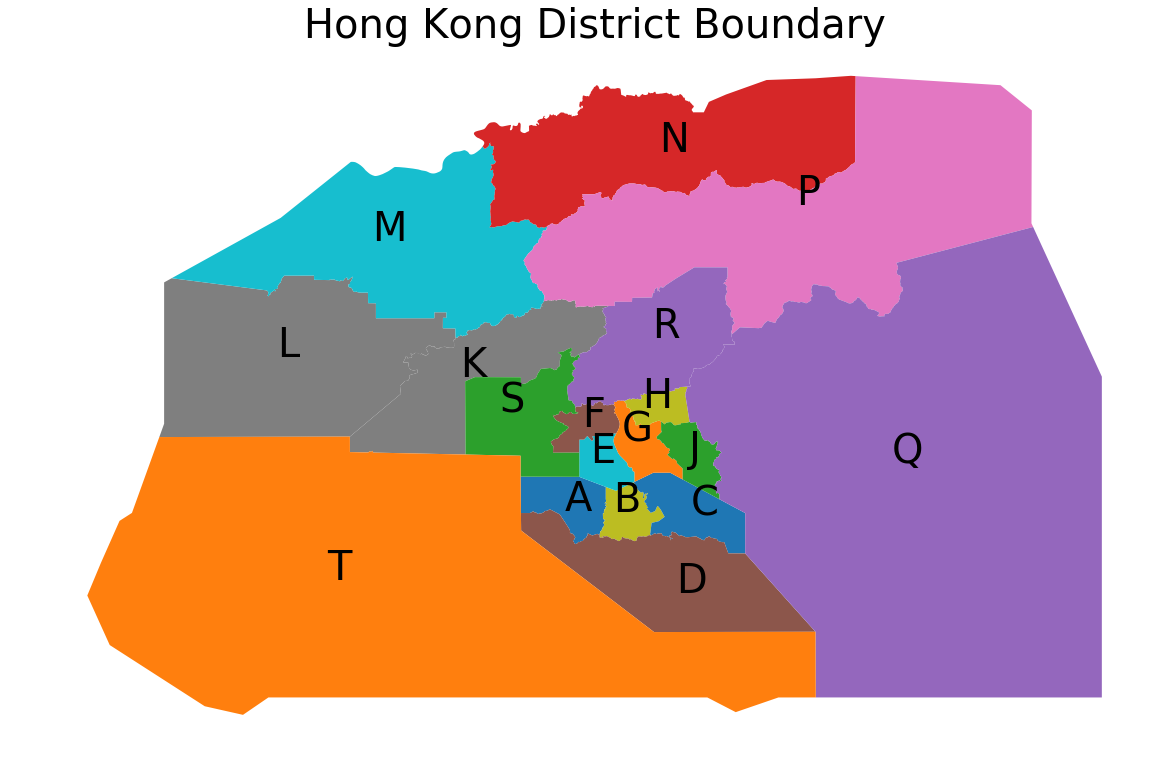

In [201]:
%matplotlib inline
import matplotlib as plt
ax = hkg.plot(column='District',  figsize=(20, 20))
ax.axis('off')
ax.set_title('Hong Kong District Boundary', fontsize=40)
for idx, row in hkg.iterrows():
    pt = row['geometry'].representative_point()
    ax.annotate(s=row['地區號碼'], xy=(pt.x, pt.y),
                 horizontalalignment='center', fontsize=40)

In [204]:
pop = pd.read_csv('Population.csv')
pop

,District,Chinese,Population,Area,Density
0,Central and Western,中西區,244600,12.44,19983.92
1,Eastern,東區,574500,18.56,31217.67
2,Southern,南區,269200,38.85,6962.68
3,Wan Chai,灣仔區,150900,9.83,15300.10
4,Sham Shui Po,深水埗區,390600,9.35,41529.41
5,Kowloon City,九龍城區,405400,10.02,40194.70
6,Kwun Tong,觀塘區,641100,11.27,56779.05
7,Wong Tai Sin,黃大仙區,426200,9.30,45645.16
8,Yau Tsim Mong,油尖旺區,318100,6.99,44864.09
9,Islands,離島區,146900,175.12,825.14


In [208]:
population = pd.read_csv('Population.csv')
population.columns = ['D', 'Chinese', 'Population', 'Area', 'Density']
hkg2 = hkg.merge(population, left_on='District', right_on='D')
del hkg2['Chinese']
hkg2.sort_values(by='Population', ascending=False)

,地區號碼,District,地區,geometry,D,Population,Area,Density
14,R,Sha Tin,沙田,"POLYGON ((114.25245 22.3936, 114.25246 22.394,...",Sha Tin,648200,68.71,9433.85
7,J,Kwun Tong,觀塘,"POLYGON ((114.22403 22.33452, 114.22397 22.334...",Kwun Tong,641100,11.27,56779.05
10,M,Yuen Long,元朗,"POLYGON ((114.1279 22.46651, 114.12657 22.4661...",Yuen Long,607200,138.46,4297.99
1,C,Eastern,東區,"POLYGON ((114.21939 22.29568, 114.21087 22.300...",Eastern,574500,18.56,31217.67
15,S,Kwai Tsing,葵青,"POLYGON ((114.14901 22.38028, 114.14753 22.378...",Kwai Tsing,507100,23.34,21503.86
9,L,Tuen Mun,屯門,"POLYGON ((114.06597 22.39181, 114.06581 22.397...",Tuen Mun,495900,82.89,5889.38
13,Q,Sai Kung,西貢,"POLYGON ((114.30925 22.14848, 114.50246 22.148...",Sai Kung,448600,129.65,3460.08
6,H,Wong Tai Sin,黃大仙,"POLYGON ((114.22403 22.33452, 114.22112 22.353...",Wong Tai Sin,426200,9.30,45645.16
5,G,Kowloon City,九龍城,"POLYGON ((114.17946 22.34902, 114.179 22.34908...",Kowloon City,405400,10.02,40194.70
4,F,Sham Shui Po,深水埗,"POLYGON ((114.17273 22.34646, 114.17258 22.346...",Sham Shui Po,390600,9.35,41529.41


Note: Please install `pySAL` in order to use `schema` when plotting.

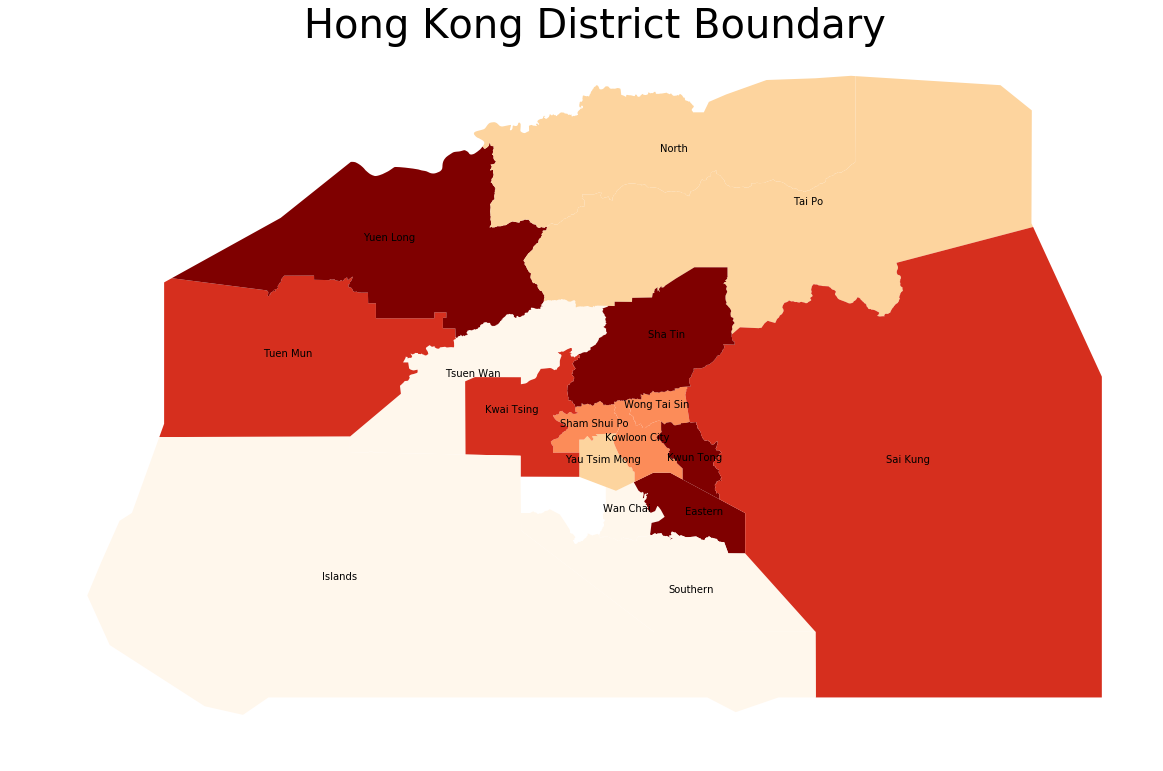

In [211]:
%matplotlib inline
import matplotlib as plt
ax = hkg2.plot(column='Population',  figsize=(20, 20), cmap='OrRd', scheme='quantiles')
ax.axis('off')
ax.set_title('Hong Kong District Boundary', fontsize=40)
for idx, row in hkg2.iterrows():
    pt = row['geometry'].representative_point()
    ax.annotate(s=row['District'], xy=(pt.x, pt.y),
                 horizontalalignment='center', fontsize=10)

# Example 2: Word Cloud
In here, we will use `WordCloud` library at https://github.com/amueller/word_cloud.
World cloud or tag cloud is a common text visualization nowadays. It can show most common or most important words in a website, blog, articles etc.

For example, this is the word cloud of Wikimedia-l generated by IBM word cloud generator.
![Example word cloud](wordcloud_example.png)

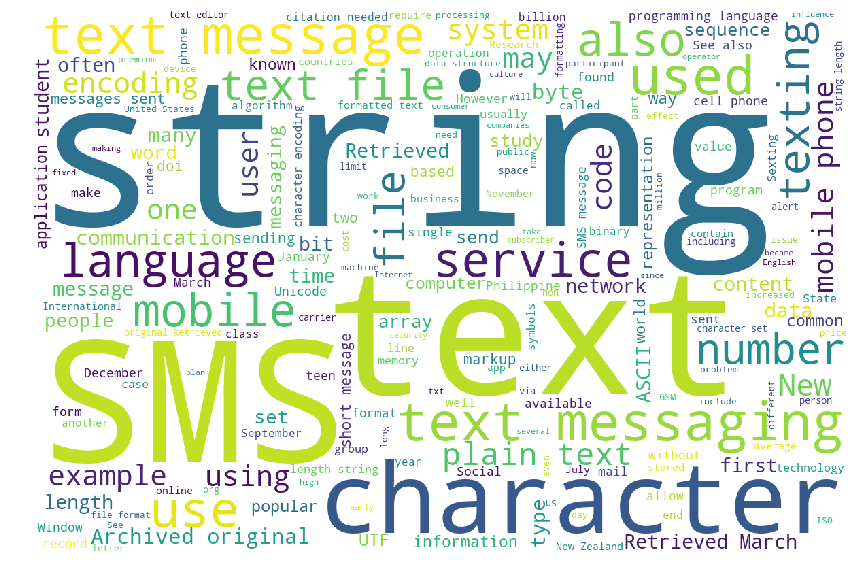

In [219]:
from wordcloud import WordCloud
text = ""
with open("wiki_text.txt", "r") as f:
    text = f.read()
wordcloud = WordCloud(background_color="white", 
                      width=1200,
                      height=800)
wordcloud.generate(text)
plt.figure( figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#  Wordcloud Mask
The default shape is a rectangle, we can alter the shape by providing a mask to `wordcloud` .

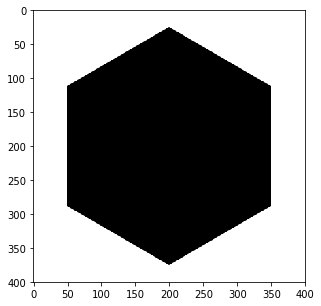

In [126]:
from PIL import Image
import numpy as np
mask_image = Image.open("docs-mask3.png")
plt.imshow(mask_image)

Then we turn the image into `numpy` 2D array.

In [127]:
circle_mask = np.array(mask_image)

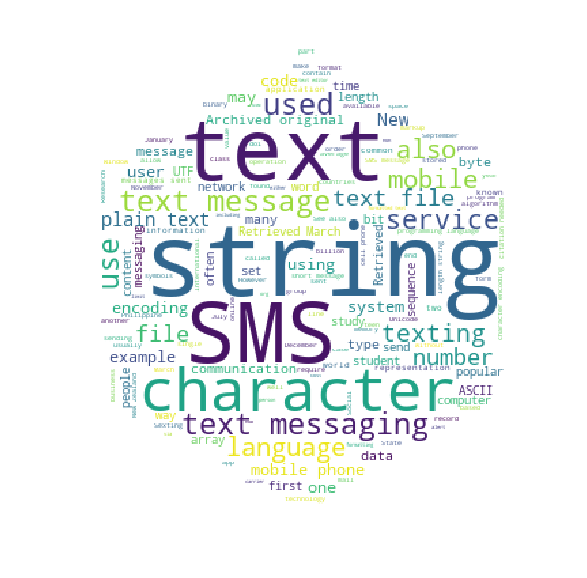

In [220]:
wordcloud2 = WordCloud(background_color="white", mask=circle_mask)
wordcloud2.generate(text)
plt.figure( figsize=(10,10))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

# Chinese Word Cloud
What about chinese text?

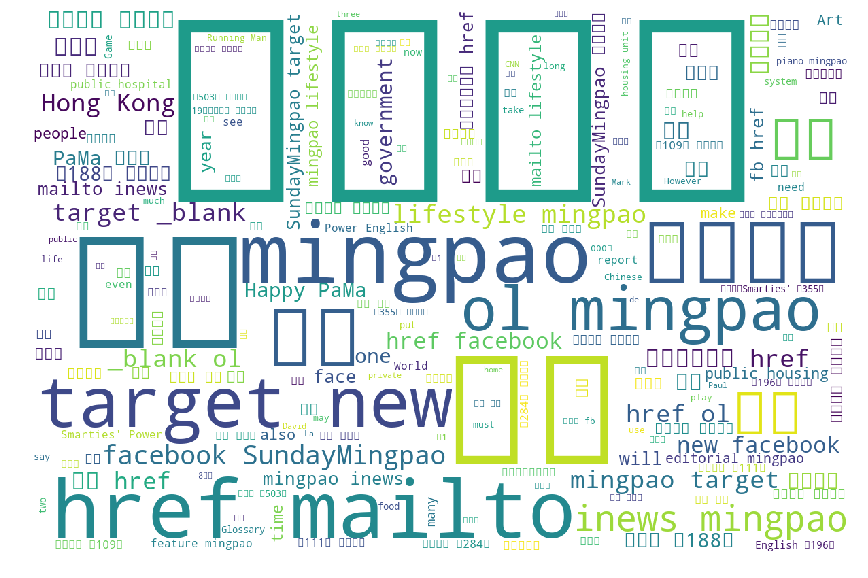

In [135]:
chi_text = ""
with open("mingpao_example.txt", "r") as f:
    chi_text = f.read()
wordcloud_chi = WordCloud(background_color="white", width=1200, height=800)
wordcloud_chi.generate(chi_text)
plt.figure( figsize=(20,10))
plt.imshow(wordcloud_chi)
plt.axis("off")
plt.show()

Such a mess, because we need to use a suitable Chinese font.

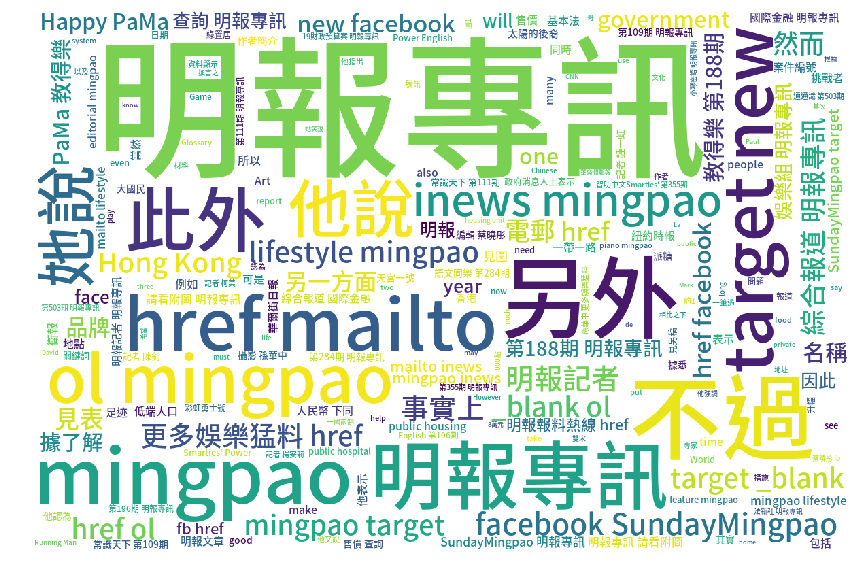

In [136]:
wordcloud_chi = WordCloud(font_path="NotoSansCJKtc-Medium.otf", background_color="white", width=1200, height=800)
wordcloud_chi.generate(chi_text)
plt.figure( figsize=(20,10))
plt.imshow(wordcloud_chi)
plt.axis("off")
plt.show()